# Task2. Coding

Our team of data scientists developed this univariate regression model that given an input x,
returns y. They now need to expose the model so that it can be used in the platform. Can
you build a prototype with the necessary interfaces to expose the model? The requirements
are the following:

- The service should return the model's prediction given an input x. This can be a single request or a batch of requests and they should be treated accordingly;

- The service should keep a record of the requests/predictions done (along with metadata you may find appropriate);

You can find the model in the artifacts folder shared with you (`./artifacts/model.joblib`) and
respective packages to build it (`./artifacts/requirements.txt`).

You're welcome to use any framework or tool you wish.


**Note:**

In the requirement.txt, I have replaced 

`sklearn==0.23.2` to `scikit-learn==0.23.2` 

due to the error:

    ERROR: Could not find a version that satisfies the requirement sklearn==0.23.2
    ERROR: No matching distribution found for sklearn==0.23.2


In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
from flask import Flask, jsonify, request, make_response
import sklearn
import json
import requests

In [2]:
# generating a test.csv file for later test

input_data = {'x': [0, 1, 2, 3, 4, 5, 10]}
data = pd.DataFrame(input_data, columns = ['x'])
data.to_csv("uploads/test.csv", index=False)

### 1. Load the model

we can see this is a LinearRegression (a + bx = y)


In [3]:
joblib_file = "../artifacts/model.joblib"  
joblib_model = joblib.load(joblib_file)
joblib_model

LinearRegression()

In [4]:
predictions = joblib_model.predict(data[['x']])
predictions

array([17.0737873 , 17.07258825, 17.07138921, 17.07019016, 17.06899112,
       17.06779207, 17.06179684])

### 2. Calculate slope & intercept

We can generate few data points, and see the prediction. In fact, it would be sufficient to calculate "a" and "b" with 2 data points. 

    a = 17.0737873 
    b = 17.07258825 - 17.0737873 = -0.00119905 (aprox.)

In [5]:
X_train=np.array([[0],[1], [2]])
joblib_model.predict(X_train)

array([17.0737873 , 17.07258825, 17.07138921])

In [6]:
a  = joblib_model.predict([[0]])[0]
b  = joblib_model.predict([[1]])[0] - a

print("a = ", a)
print("b = ", b)

a =  17.073787300326433
b =  -0.0011990458840429596


Let's generate some random points and plot the scatterplot

<AxesSubplot:>

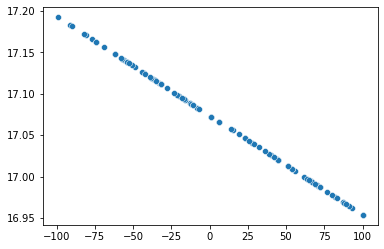

In [7]:
randnums= np.random.randint(-101,101,100)
pred = joblib_model.predict(randnums.reshape(-1, 1))
sns.scatterplot(x=randnums,y=pred)

### 3. Building Flask API to serve the model

Refereces:

https://towardsdatascience.com/data-science-in-production-building-flask-apis-to-serve-ml-models-with-best-practices-997faca692b9

https://towardsdatascience.com/building-prediction-apis-in-python-part-1-series-introduction-basic-example-fe89e12ffbd3



https://medium.com/analytics-vidhya/dockerize-your-python-flask-application-and-deploy-it-onto-heroku-650b7a605cc9


### 4. Testing our API on local

    step1: Run app.py
    step2: run the following cell
    
Then you will obtain the predictions for your input data.

Test '/prediction' endpoint

In [8]:

# reading test data and converting it into dictionary
data=pd.read_csv('./uploads/test.csv')
data=data.to_dict('records')

# packaging the data dictionary into a new dictionary
data_json={'data':data}
print(data_json)


# info for the api request
url = 'http://0.0.0.0:5000/prediction'
headers = {
    'content-type': "application/json",
    'cache-control': "no-cache",
}
param = json.dumps(data_json)
print(param)

# making the api request
response = requests.get(url, headers=headers, data=param)

# getting the json data out
output_data=response.json()
print(output_data)

{'data': [{'x': 0}, {'x': 1}, {'x': 2}, {'x': 3}, {'x': 4}, {'x': 5}, {'x': 10}]}
{"data": [{"x": 0}, {"x": 1}, {"x": 2}, {"x": 3}, {"x": 4}, {"x": 5}, {"x": 10}]}
{'y': [17.073787300326433, 17.07258825444239, 17.07138920855835, 17.070190162674308, 17.068991116790265, 17.067792070906226, 17.061796841486018]}


Test '/predict' endpoint

In [9]:
expected_response = {'y': [17.073787300326433]}

# making the api request
response = requests.get('http://0.0.0.0:5000/predict?x=0')

# getting the json data out
print("expected prediction:", expected_response)
print("prediction:", response.json())

# Check that we got "200 OK" back.
assert response.status_code == 200

# response value match the expected value for x=0
assert abs(response.json()['y'][0] - expected_response['y'][0])<0.00001

expected prediction: {'y': [17.073787300326433]}
prediction: {'y': [17.073787300326433]}


### Test the final version

https://realxdeal.herokuapp.com/
    

In [10]:
response = requests.get('https://realxdeal.herokuapp.com/predict?x=0')
print("prediction:", response.json())

prediction: {'y': [17.073787300326433]}
